In [1]:
import numpy as np
import pandas as pd
import re
import statistics as stats
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
TRAINING_DATA_FILE = './../data/train_data.json'
TEST_DATA_FILE = './../data/test_data.json'

In [3]:
train_data = pd.read_json(TRAINING_DATA_FILE, orient="index")
test_data = pd.read_json(TEST_DATA_FILE, orient='index')

In [4]:
#set index
train_data.reset_index(level = 0, inplace = True)
train_data.rename(columns={'index':'ID'}, inplace=True)

test_data.reset_index(level = 0, inplace = True)
test_data.rename(columns={'index':'ID'}, inplace=True)

In [5]:
tr = train_data
te = test_data
# train_data = tr
# test_data = te

In [6]:
train_data.head()

,ID,cities,dow,genres,segment,titles,tod
0,train-1,"gurgaon:55494,delhi:31892","1:3412,3:15878,2:1737,5:10975,4:20974,7:17820,...","Cricket:82379,Kabaddi:255,Reality:4751",neg,"Top Raids: Haryana vs Services SCB:103,Day 4: ...","10:26,13:331,12:323,20:21864,21:16233,17:7953,..."
1,train-10,"delhi:5862,nagar:8916,mumbai:1593","1:5745,3:3025,2:3346,5:123,4:3007,7:1108,6:10","Cricket:15640,Wildlife:730",neg,"Dhoni Quits Captaincy:148,Day 4: India Move in...","11:1661,10:384,20:401,21:798,22:221,16:525,19:..."
2,train-100,navi mumbai:4142,3:4142,"LiveTV:13,Football:4129",neg,"Star Sports 4:13,Manchester United vs Everton:...","1:1207,0:2406,2:529"
3,train-1000,"new delhi:4131,chennai:2878,navi mumbai:1339","1:658,3:5867,5:413,4:1339,7:71","TalkShow:658,Cricket:7690",neg,"SRH vs RCB:701,KKR vs KXIP:1042,MI vs SRH:2288...","11:71,20:2417,21:1042,23:2288,19:1872,8:658"
4,train-10000,"gurgaon:6077,chennai:4055","1:1641,2:480,4:1445,7:1663,6:4900","Drama:5503,Cricket:3283,Reality:1345",neg,"MI vs KKR:304,Yeh Rishta Kya Kehlata Hai:5449,...","20:158,22:4139,17:67,23:1510,19:288,18:56,0:23..."


In [7]:
#check data
print ('Train data has {} rows and {} columns'.format(train_data.shape[0],train_data.shape[1]))
print ('test_data data has {} rows and {} columns'.format(test_data.shape[0],test_data.shape[1]))

Train data has 200000 rows and 7 columns
test_data data has 100000 rows and 6 columns


In [8]:
#Encode Target Variable
train_data = train_data.replace({'segment':{'pos':1,'neg':0}})

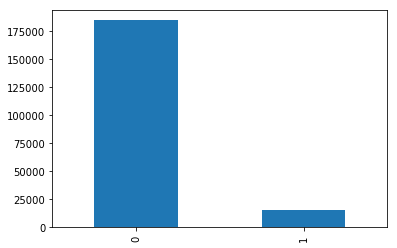

In [9]:
#check target variable count
train_data['segment'].value_counts().plot(kind='bar')
plt.show()

In [10]:
columns = train_data.columns
# columns = ['cities', 'dow', 'genres', 'titles', 'tod']
columns = ['cities', 'dow', 'genres', 'tod']

In [11]:
val  = np.array([1,2,3,4])
stats.mean(val)

2

In [12]:
def row_sum(row):
    vals = np.array([int(i.strip(":")) for i in re.findall("\:\d+", row)])
    return vals.sum()

def row_mean(row):
    vals = np.array([int(i.strip(":")) for i in re.findall("\:\d+", row)])
    return vals.mean()

def row_stdev(row):
    try:
        vals = np.array([int(i.strip(":")) for i in re.findall("\:\d+", row)])
        return stats.stdev(vals)
    except:
        return 0.0

In [13]:
train_data['watch_hours_sum'] = train_data.cities.apply(row_sum)
train_data['watch_hours_mean'] = train_data.cities.apply(row_mean)
train_data['watch_hours_stdev'] = train_data.cities.apply(row_stdev)
test_data['watch_hours_sum'] = test_data.cities.apply(row_sum)
test_data['watch_hours_mean'] = test_data.cities.apply(row_mean)
test_data['watch_hours_stdev'] = test_data.cities.apply(row_stdev)

In [14]:
train_data['dow_sum'] = train_data.dow.apply(row_sum)
train_data['dow_mean'] = train_data.dow.apply(row_mean)
train_data['dow_stdev'] = train_data.dow.apply(row_stdev)
test_data['dow_sum'] = test_data.dow.apply(row_sum)
test_data['dow_mean'] = test_data.dow.apply(row_mean)
test_data['dow_stdev'] = test_data.dow.apply(row_stdev)

In [15]:
train_data['tod_sum'] = train_data.tod.apply(row_sum)
train_data['tow_mean'] = train_data.tod.apply(row_mean)
train_data['tod_stdev'] = train_data.tod.apply(row_stdev)
test_data['tod_sum'] = test_data.tod.apply(row_sum)
test_data['tow_mean'] = test_data.tod.apply(row_mean)
test_data['tod_stdev'] = test_data.tod.apply(row_stdev)

In [16]:
train_data['title_sum'] = train_data.titles.apply(row_sum)
train_data['title_mean'] = train_data.titles.apply(row_mean)
train_data['title_stdev'] = train_data.titles.apply(row_stdev)
test_data['title_sum'] = test_data.titles.apply(row_sum)
test_data['title_mean'] = test_data.titles.apply(row_mean)
test_data['title_stdev'] = test_data.titles.apply(row_stdev)

/Users/shams/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice.


In [17]:
train_data['genre_sum'] = train_data.genres.apply(row_sum)
train_data['genre_mean'] = train_data.genres.apply(row_mean)
train_data['genre_stdev'] = train_data.genres.apply(row_stdev)
test_data['genre_sum'] = test_data.genres.apply(row_sum)
test_data['genre_mean'] = test_data.genres.apply(row_mean)
test_data['genre_stdev'] = test_data.genres.apply(row_stdev)

In [18]:
train_data.head()

,ID,cities,dow,genres,segment,titles,tod,watch_hours_sum,watch_hours_mean,watch_hours_stdev,...,dow_stdev,tod_sum,tow_mean,tod_stdev,title_sum,title_mean,title_stdev,genre_sum,genre_mean,genre_stdev
0,train-1,"gurgaon:55494,delhi:31892","1:3412,3:15878,2:1737,5:10975,4:20974,7:17820,...","Cricket:82379,Kabaddi:255,Reality:4751",0,"Top Raids: Haryana vs Services SCB:103,Day 4: ...","10:26,13:331,12:323,20:21864,21:16233,17:7953,...",87386,43693.000000,16689.134250,...,7404.117098,87377,6241.214286,6531.599192,87363.0,1456.050000,2309.102640,87385,29128.333333,46171.188300
1,train-10,"delhi:5862,nagar:8916,mumbai:1593","1:5745,3:3025,2:3346,5:123,4:3007,7:1108,6:10","Cricket:15640,Wildlife:730",0,"Dhoni Quits Captaincy:148,Day 4: India Move in...","11:1661,10:384,20:401,21:798,22:221,16:525,19:...",16371,5457.000000,3678.260594,...,2056.775389,16361,1022.562500,1029.778617,16356.0,233.657143,580.001724,16370,8185.000000,10542.962107
2,train-100,navi mumbai:4142,3:4142,"LiveTV:13,Football:4129",0,"Star Sports 4:13,Manchester United vs Everton:...","1:1207,0:2406,2:529",4142,4142.000000,0.000000,...,0.000000,4142,1380.666667,950.474618,4142.0,2071.000000,2910.451511,4142,2071.000000,2910.451511
3,train-1000,"new delhi:4131,chennai:2878,navi mumbai:1339","1:658,3:5867,5:413,4:1339,7:71","TalkShow:658,Cricket:7690",0,"SRH vs RCB:701,KKR vs KXIP:1042,MI vs SRH:2288...","11:71,20:2417,21:1042,23:2288,19:1872,8:658",8348,2782.666667,1398.439130,...,2391.932273,8348,1391.333333,947.642865,8348.0,1043.500000,1005.743009,8348,4174.000000,4972.374885
4,train-10000,"gurgaon:6077,chennai:4055","1:1641,2:480,4:1445,7:1663,6:4900","Drama:5503,Cricket:3283,Reality:1345",0,"MI vs KKR:304,Yeh Rishta Kya Kehlata Hai:5449,...","20:158,22:4139,17:67,23:1510,19:288,18:56,0:23...",10132,5066.000000,1429.769912,...,1678.358126,10129,1125.444444,1402.447860,10129.0,920.818182,1620.173139,10131,3377.000000,2080.593185


In [19]:
df_columns = [
    'id', 
    'segment', 
    'watch_hours_sum', 
    'watch_hours_mean', 
    'watch_hours_stdev', 
    'dow_sum',
    'dow_mean',
    'dow_stdev',
    'tod_sum',
    'tod_mean',
    'tod_stdev',
    'title_sum',
    'title_mean',
    'title_stdev',
    'genre_sum',
    'genre_mean',
    'genre_stdev'
]
for row in tqdm(train_data.itertuples(), total=len(train_data)):
    for col in columns:
        for elem in getattr(row, col).split(','):
            probe = re.findall('\:\d+', elem)
            if len(probe):
                num = probe[0]
                key = col + "_" + elem.replace(num, '')
                if key not in df_columns:
                    df_columns.append(key)
print(len(df_columns))

100%|██████████| 200000/200000 [00:15<00:00, 12515.31it/s]

1441


In [20]:
df_columns.index('id')

0

In [21]:
row_list = []
for row in tqdm(train_data.itertuples(), total=len(train_data)):
    row_i = [0] * len(df_columns)
    row_i[df_columns.index('id')] = getattr(row, 'ID')
    row_i[df_columns.index('segment')] = getattr(row, 'segment')
    for col in columns:
        for elem in getattr(row, col).split(','):
            probe = re.findall('\:\d+', elem)
            if len(probe):
                num = probe[0]
                key = col + "_" + elem.replace(num, '')
                num = num.strip(":")
                row_i[df_columns.index(key)] = num
    row_list.append(row_i)

100%|██████████| 200000/200000 [00:32<00:00, 6142.96it/s]


In [22]:
df_train = pd.DataFrame(row_list, columns=df_columns)
df_train.index = df_train.id

In [ ]:
# dow_cols = [col for col in df_train.columns if col.startswith('dow')]
# tod_cols = [col for col in df_train.columns if col.startswith('tod')]
# df_train['dow_row_mean'] = df_train[dow_cols].astype(float).mean(axis=1)
# df_train['tod_row_mean'] = df_train[tod_cols].astype(float).mean(axis=1)

In [23]:
df_train.head()

,id,segment,watch_hours_sum,watch_hours_mean,watch_hours_stdev,dow_sum,dow_mean,dow_stdev,tod_sum,tod_mean,...,cities_wallingford,cities_aalborg,cities_wallington,cities_belfast,cities_eivissa,cities_minhang qu,cities_streatham,cities_zhenruzhen,cities_pavlodar,cities_louisville
id,,,,,,,,,,,,,,,,,,,,,
train-1,train-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
train-10,train-10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
train-100,train-100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
train-1000,train-1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
train-10000,train-10000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
row_list = []
for row in tqdm(test_data.itertuples(), total=len(test_data)):
    row_i = [0] * len(df_columns)
    row_i[df_columns.index('id')] = getattr(row, 'ID')
    for col in columns:
        for elem in getattr(row, col).split(','):
            probe = re.findall('\:\d+', elem)
            if len(probe):
                num = probe[0]
                key = col + "_" + elem.replace(num, '')
                num = num.strip(":")
                try:
                    row_i[df_columns.index(key)] = num
                except:
                    continue
    row_list.append(row_i)
df_test = pd.DataFrame(row_list, columns=df_columns)
df_test.index = df_test.id

100%|██████████| 100000/100000 [00:11<00:00, 9060.58it/s]


In [ ]:
# df_test['dow_row_mean'] = df_test[dow_cols].astype(float).mean(axis=1)
# df_test['tod_row_mean'] = df_test[tod_cols].astype(float).mean(axis=1)
# df_test.head()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split

In [27]:
target = df_train['segment']
train_data = df_train.drop(['segment', 'id'], axis=1, inplace=False)

In [28]:
test_data = df_test.drop('id', axis=1, inplace=False)

In [29]:
test_data = test_data.drop('segment', axis=1, inplace=False)

In [30]:
test_data = test_data.astype(float)
test_data.head()

,watch_hours_sum,watch_hours_mean,watch_hours_stdev,dow_sum,dow_mean,dow_stdev,tod_sum,tod_mean,tod_stdev,title_sum,...,cities_wallingford,cities_aalborg,cities_wallington,cities_belfast,cities_eivissa,cities_minhang qu,cities_streatham,cities_zhenruzhen,cities_pavlodar,cities_louisville
id,,,,,,,,,,,,,,,,,,,,,
test-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test-100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test-1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test-10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data.head()

In [ ]:
print(train_data.shape)
print(test_data.shape)
test = test_data.columns.tolist()
train = train_data.columns.tolist()
test.sort()
train.sort()

In [ ]:
# df_test.drop('title_sum', axis=1, inplace=True)

In [ ]:

## uncomment to do grid search - could get better score
# X_train, X_val, y_train, y_val = train_test_split(train_data, target, train_size=0.6, random_state = 1)

## doing grid search for parameters
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.grid_search import GridSearchCV
# from sklearn.metrics import roc_auc_score, make_scorer
# clf_scorer = make_scorer('roc_auc')
# rfc = RandomForestClassifier(n_estimators=100,oob_score=True,)
# param_grid = {
#     'max_depth':[4,8,12],
#     'max_features':['sqrt',10,15]
    
# }

# cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring=clf_scorer)
# cv_rfc.best_params_

In [ ]:
#train final model
rf_model = RandomForestClassifier(n_estimators=500,max_depth=12, max_features=10, verbose=50)
rf_model.fit(df_train, target)

In [ ]:
#make prediction
rf_pred = rf_model.predict_proba(df_test)

In [ ]:
#make submission file and submit
columns = ['segment']
sub = pd.DataFrame(data=rf_pred[:,1], columns=columns)
sub['ID'] = test_id
sub = sub[['ID','segment']]
sub.to_csv("sub_hot.csv", index=False)

In [ ]:
print(X_train.columns)
print(test_data.columns)

In [31]:
from xgboost import XGBClassifier
import xgboost as xgb_

In [ ]:
# xyz = (train_data - train_data.mean())/ (train_data.max() - train_data.min())

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(train_data.astype(float), target, test_size=0.3, random_state=1, stratify=target)

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.01
params['eval_metric'] = 'auc'
# params['num_class'] = 2
params['n_estimators'] = 1000
params['max_depth'] = 4  # or 5
params['min_child_weight'] = 1 # or 1
params['gamma'] = 0 # or 0
params['subsample'] = 0.8
params['colsample_bytree'] = 0.8 # or 0.8
params['nthread'] = 4
params['scale_pos_weight'] = 1
params['seed'] = 1

d_train = xgb_.DMatrix(X_train, label=y_train)
d_valid = xgb_.DMatrix(X_valid, label=y_valid)
# d_train = xgb_.DMatrix(train_data.astype(float), label=target)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
# watchlist = [(d_train, 'train')]

bst = xgb_.train(params, d_train, 1870, watchlist, early_stopping_rounds=50, verbose_eval=50)

[0]	train-auc:0.709316	valid-auc:0.713916
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.801666	valid-auc:0.805985
[100]	train-auc:0.804068	valid-auc:0.807758
[150]	train-auc:0.805117	valid-auc:0.808465
[200]	train-auc:0.806743	valid-auc:0.809432
[250]	train-auc:0.808908	valid-auc:0.810763
[300]	train-auc:0.810717	valid-auc:0.811819
[350]	train-auc:0.81256	valid-auc:0.812759
[400]	train-auc:0.814133	valid-auc:0.813486
[450]	train-auc:0.815782	valid-auc:0.814315
[500]	train-auc:0.817276	valid-auc:0.815045
[550]	train-auc:0.81874	valid-auc:0.815684
[600]	train-auc:0.820145	valid-auc:0.816207
[650]	train-auc:0.821367	valid-auc:0.816685
[700]	train-auc:0.822531	valid-auc:0.817114
[750]	train-auc:0.823598	valid-auc:0.817503


In [ ]:
test_data.columns

In [ ]:
d_test = xgb_.DMatrix(test_data)
p_test = bst.predict(d_test)

In [ ]:
p_test.shape

In [ ]:
p_test

In [ ]:
#make submission file and submit
columns = ['segment']
sub = pd.DataFrame(data=p_test, columns=columns)
sub['ID'] = test_data.index.tolist()
sub = sub[['ID','segment']]
sub.to_csv("sub_hot_xgb.csv", index=False)

In [ ]:
sub.head()

In [ ]:
import matplotlib.pyplot as plt 
xgb_.plot_importance(bst)

In [ ]:
plt.show()